# Scipy

[Scipy](https://scipy.org/) is the fundamental package for scientific computing with Python.

### Installation:

<div class="alert alert-block alert-warning">
$ pip install scipy
</div>

In [1]:
! pip install scipy

# Integration

+ `quad`

In [3]:
import numpy as np
import scipy.integrate as integrate

In [9]:
appr = integrate.quad(lambda x: np.sin(x), a=0, b=np.pi)
exact = -np.cos(np.pi) + np.cos(0)

In [10]:
exact, appr

(2.0, (2.0, 2.220446049250313e-14))

In [11]:
appr[0] == exact

True

In [12]:
def f(x):
    return np.log(x)*np.sin(x)

In [13]:
int_app = integrate.quad(f, a=1, b=np.inf)

C:\Users\smhasg\AppData\Local\Temp\ipykernel_10052\1802525865.py:1: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  int_app = integrate.quad(f, a=1, b=np.inf)


In [14]:
int_app

(-36745106.65560909, 71031132.84166193)

In [15]:
def g(x):
    return 1/x**2

In [16]:
int_app = integrate.quad(g, a=1, b=np.inf)

In [17]:
int_app

(1.0, 1.1102230246251565e-14)

In [18]:
def h(x, ar1, ar2):
    return ar1 + ar2/x**2

In [28]:
int_app = integrate.quad(h, a=1, b=np.inf, args=(0, 3))

In [29]:
def o(x, alpha, beta):
    return np.sin(alpha*x) + beta*np.cos(x)

In [30]:
int_app = integrate.quad(o, a=-np.pi, b=np.pi, args=(0.5, 2))

In [31]:
int_app

(1.0463605494025895e-15, 9.473169656463892e-14)

# Interpolation

+ `interp1d`

In [32]:
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

In [95]:
x = np.linspace(0, 10, 101) # x = np.arange(0, 5.25,  0.25)
y = np.sin(np.sqrt(x))

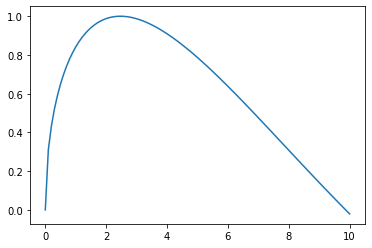

In [96]:
plt.plot(x, y)

In [106]:
# indx = np.unique(np.random.randint(0, 101, (40, )))
# print(len(indx))
xx = np.linspace(0, 10, 11) # x = np.arange(0, 5.25,  0.25)
yy = np.sin(np.sqrt(xx))
p1 = interp1d(xx, yy, kind='linear') # xx[i]..xx[i+1] ax+b 
p2 = interp1d(xx, yy, kind='quadratic') # xx[i]..xx[i+1] ax**2+ bx + c
p3 = interp1d(xx, yy, kind='cubic') # xx[i]..xx[i+1] ax**3+bx**2 + cx + d

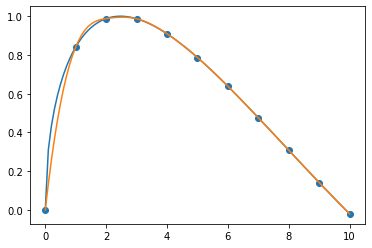

In [112]:
plt.plot(x, y)
plt.scatter(xx, yy)
# plt.plot(x, p1(x))
# plt.plot(x, p2(x))
plt.plot(x, p3(x))

In [118]:
def f(x):
    return np.sqrt(np.sin(x)**2)

In [19]:
x = np.linspace(-2*np.pi, 2*np.pi, 1001)
y = f(x)

plt.plot(x, y);

C:\Users\smhasg\AppData\Local\Temp\ipykernel_10052\3395398883.py:2: RuntimeWarning: divide by zero encountered in log
  return np.log(x)*np.sin(x)
C:\Users\smhasg\AppData\Local\Temp\ipykernel_10052\3395398883.py:2: RuntimeWarning: invalid value encountered in log
  return np.log(x)*np.sin(x)
C:\Users\smhasg\AppData\Local\Temp\ipykernel_10052\3395398883.py:2: RuntimeWarning: invalid value encountered in multiply
  return np.log(x)*np.sin(x)


NameError: name 'plt' is not defined

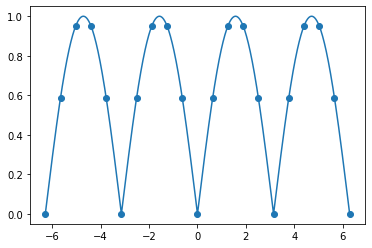

In [142]:
interplotation_points = np.linspace(-2*np.pi, 2*np.pi, 21)
y_f = f(interplotation_points)

plt.plot(x, y);
plt.scatter(interplotation_points, y_f);

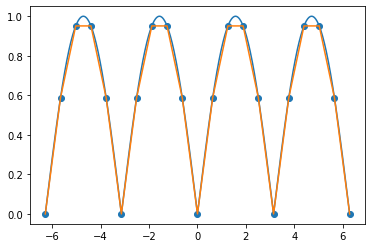

In [143]:
f_l = interp1d(interplotation_points, y_f, kind='linear')
plt.plot(x, y);
plt.scatter(interplotation_points, y_f);
plt.plot(x, f_l(x));

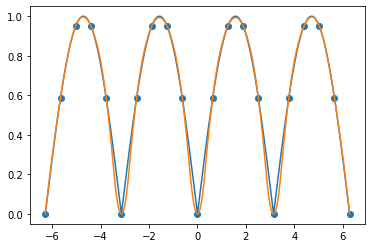

In [144]:
f_q = interp1d(interplotation_points, y_f, kind='quadratic')
plt.plot(x, y);
plt.scatter(interplotation_points, y_f);
plt.plot(x, f_q(x));

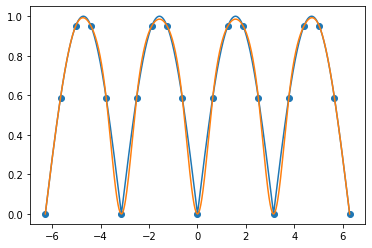

In [146]:
f_c = interp1d(interplotation_points, y_f, kind='cubic')
plt.plot(x, y);
plt.scatter(interplotation_points, y_f);
plt.plot(x, f_c(x));

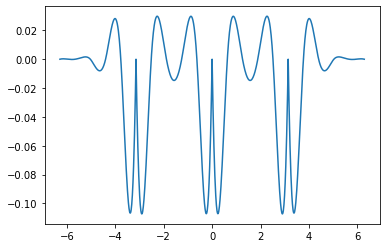

In [147]:
plt.plot(x, f_c(x) - y)

# Optimization

+ `minimize`

In [148]:
from scipy.optimize import minimize

In [152]:
ans = minimize(lambda x: x**2 + 1, method='nelder-mead', x0=10)

In [154]:
ans.x, ans.fun

(array([0.]), 1.0)

In [157]:
ans = minimize(lambda x: np.sum(x**2) + 1, method='nelder-mead', x0=np.array([10, 10]))

In [159]:
ans.x, ans.fun

(array([1.49644896e-05, 2.14267502e-05]), 1.0000000006830416)

In [160]:
ans = minimize(lambda x: np.sum(x**2) + 1, method='nelder-mead', x0=np.array([10, 10, 10, 10]))

In [162]:
ans.x, ans.fun

(array([-2.65442237e-05,  1.12314782e-05, -1.51653776e-05, -3.40479927e-05]),
 1.0000000022199964)

In [163]:
ans = minimize(lambda x: np.sum(x**4) - np.sum(x**2) + 1, method='nelder-mead', x0=np.array([10, 10, 10, 10]))

In [166]:
ans.x, ans.fun

(array([ 0.70708922,  0.70710839, -0.70707479, -0.70712814]),
 3.5809631926397856e-09)